---
title: "Data227 HW4"
format: pdf
jupyter: python3
---

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
storms = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/dplyr/storms.csv")
names = pd.read_csv('names.csv')

In [98]:
#Problem 1a
names.columns=['name', 'gender']
storms = storms.merge(names, on='name', how='left')
storms

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,gender_x,wind_cat,gender_y
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,F,2,F
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,F,2,F
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,F,2,F
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,F,2,F
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,NaN,NaN,F,2,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,11855,Iota,2020,11,17,12,13.7,-84.7,hurricane,1,75,965,270.0,30.0,N,5,N
11855,11856,Iota,2020,11,17,18,13.7,-85.7,tropical storm,0,55,988,210.0,0.0,N,5,N
11856,11857,Iota,2020,11,18,0,13.8,-86.7,tropical storm,0,40,1000,140.0,0.0,N,5,N
11857,11858,Iota,2020,11,18,6,13.8,-87.8,tropical storm,0,35,1005,140.0,0.0,N,5,N


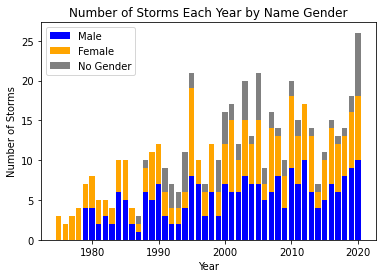

In [32]:
#Problem 1b
years = storms['year'].unique().tolist()
m = []
n = []
f = []
for year in years:
    year_df = storms[storms['year']==year]
    m.append(len(year_df[year_df['gender']=='M']['name'].unique()))
    f.append(len(year_df[year_df['gender']=='F']['name'].unique()))
    n.append(len(year_df[year_df['gender']=='N']['name'].unique()))
fig, ax = plt.subplots()
ax.bar(years, m, label='Male', color='blue')
ax.bar(years, f, label='Female', color='orange', bottom = np.array(m))
ax.bar(years, n, label='No Gender', color='grey', bottom = np.array(f)+np.array(m))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Storms')
ax.set_title('Number of Storms Each Year by Name Gender')
ax.legend()
plt.show()

1b. The above graph displays the number of storms each year by the gender of the storm's name. In general, the total number of storms has been increasing over time, and their tends to be a similar amount of male and female storms, with much fewer storms without an assigned gender. For this graph, I those a color scheme with three distinct colors, since the variable being labeled, gender, is categorical. Additionally, the colors themselves contrast with one another so that it is easy to view trends in the number of storms by each gender. 

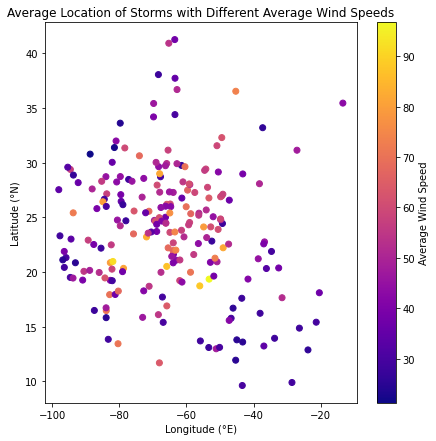

In [93]:
#Problem 1c
lats = []
longs = []
winds = []
for name in storms['name'].unique().tolist():
    name_df = storms[storms['name']==name]
    lats.append(name_df['lat'].mean())
    longs.append(name_df['long'].mean())
    winds.append(name_df['wind'].mean())
plt.figure(figsize=(7, 7))
scatter=plt.scatter(longs, lats, c=winds, cmap='plasma')
plt.colorbar(scatter, label='Average Wind Speed')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('Average Location of Storms with Different Average Wind Speeds')
plt.show()

1c. The figure above displays the average latitude and longitude of storms colored by their average wind speed. These storms have all been in the Northern and Western Hemispheres, all being between -15 and -100 degrees East and 5 and 45 degrees North. Most of them have had wind speeds on the lower end of the possible scale, with a much higher frequency of storms with average wind speeds near 30 miles and hour than near 90 miles an hour. For this graph I used the plasma gradient color scheme, since the data being displayed, average wind speed, is continuous, and the colors clearly contrast and get brighter as the speed goes from low to high. 

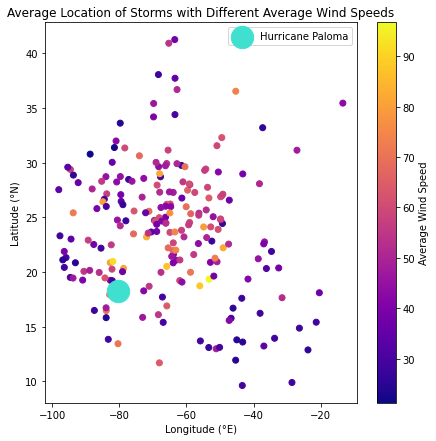

In [96]:
#Problem 1d
lats = []
longs = []
winds = []
for name in storms['name'].unique().tolist():
    if name != 'Paloma':
        name_df = storms[storms['name']==name]
        lats.append(name_df['lat'].mean())
        longs.append(name_df['long'].mean())
        winds.append(name_df['wind'].mean())
plt.figure(figsize=(7, 7))
paloma = storms[storms['name']=='Paloma']
scatter=plt.scatter(longs, lats, c=winds, cmap='plasma')
plt.colorbar(scatter, label='Average Wind Speed')
plt.scatter(paloma['long'].mean(), paloma['lat'].mean(), label='Hurricane Paloma', s=500, color='turquoise')
plt.legend()
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('Average Location of Storms with Different Average Wind Speeds')
plt.show()

1d. This is the same graph as before, but it highlights the hurricane I used in the previous assignment, Hurricane Paloma. The hurricane is highlighted with a color different from the one on the spectrum of wind speed colors so that it stands out, and its size is increased. This makes its labeling very clear to the viewer.

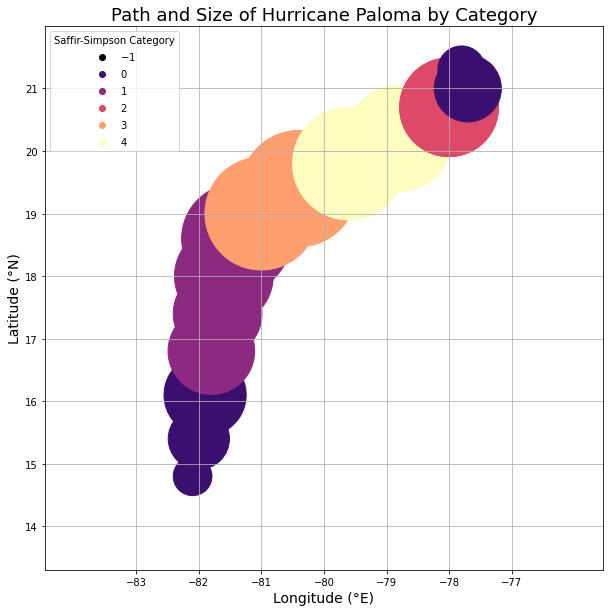

In [79]:
#Problem 1e
paloma = storms[storms['name']=='Paloma']
x = paloma['long']
y = paloma['lat']
cat = paloma['category'].tolist()
plt.figure(figsize=(10,10))
scatter=plt.scatter(x, y, s=np.array(paloma['tropicalstorm_force_diameter'])*75, label='Tropical storm diameter', c=cat, cmap='magma')
#plt.scatter(x, y, s=np.array(paloma['hurricane_force_diameter'])*75, label='Hurricane diameter', c=cat, cmap='magma')
#plt.scatter(x, y, label='Location of storm center', c=cat, cmap='magma')
plt.axis('equal')
plt.xticks([-83, -82, -81, -80, -79, -78, -77])
plt.xlabel('Longitude (°E)', fontsize=14)
plt.ylabel('Latitude (°N)', fontsize=14)
legend1 = plt.legend(*scatter.legend_elements(num=6),loc="upper left", title="Saffir-Simpson Category")
plt.grid(True)
plt.title('Path and Size of Hurricane Paloma by Category', fontsize=18)
plt.show()

1e. This graph maps out the location and size, by tropical storm diameter, of Hurricane Paloma. The storm started out small and with wind speeds of a tropical depression, but eventually grew into a larger category 4 hurricane. The storm is colored by Saffir-Simpson category using magma color scheme, which is a gradient, going from low to high on the number of the category. This scheme is appropriate since it is labeling a numerical variable as it increases in intensity, as the colors get brighter as the category number increases, and then get darker as it decreases again. The color scheme helps to effectively indicate the changing wind speed and intensity of the storm. 

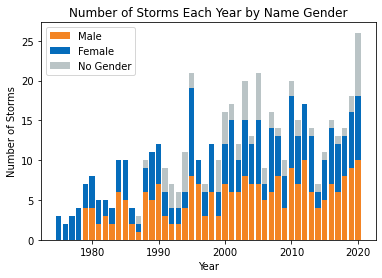

In [97]:
#Problem 1f
colors = ['#f38424', '#056cbb', '#bac4c6']
years = storms['year'].unique().tolist()
m = []
n = []
f = []
for year in years:
    year_df = storms[storms['year']==year]
    m.append(len(year_df[year_df['gender']=='M']['name'].unique()))
    f.append(len(year_df[year_df['gender']=='F']['name'].unique()))
    n.append(len(year_df[year_df['gender']=='N']['name'].unique()))
fig, ax = plt.subplots()
ax.bar(years, m, label='Male', color=colors[0])
ax.bar(years, f, label='Female', color=colors[1], bottom = np.array(m))
ax.bar(years, n, label='No Gender', color=colors[2], bottom = np.array(f)+np.array(m))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Storms')
ax.set_title('Number of Storms Each Year by Name Gender')
ax.legend()
plt.show()

1f. For a new color scheme, I chose the colors of the New York Knicks basketball team and applied it to my graph from 1b. 